# Data Visualisation

## Table of Contents

### Property Prices Data From 2007 to 2019 Visualisation
[Propety Sales Price Trend](#property2007to2019)<br>
[Propety Sales Price Percentage Increase](#percentincrease)<br>
[Sales Price vs Borough](#boroughbarplot)<br>
[Sales Price vs Land](#land)<br>
[Sales Price vs Tax Class](#taxclass)<br>
[Sales Price vs Year Built](#yearbuilt)<br>
[Sales Price vs Neighbourhood](#neighbourhood)<br>


### School Data Visualisation
[Number of Schools per borough](#school)<br>
[Number of Schools per Student Population in each borough](#schperstudent)<br>
[Average SAT Scores of each borough](#satscore)<br>
[Clustered Marker Map of Shools in NYC](#mapsch)<br>

### Rat Sightings Data Visualisation
[Number of Rat Sightings per Borough](#ratsbar)<br>
[Number of Rat Sightings per area in each borough](#ratsbar1)<br>
[Heatmap of Rat Sightings in NYC](#heatmap)<br>

### Population Data Visualisation
[Population Growth Grouped Barplot per borough](#population)<br>


### Crime Data From 1990 to 2018 Visualisation
[Number of Crimes Per Year in all boroughs](#lineplot1crime)<br>
[Number of Crimes per population in all boroughs](#crimperpop)<br>
[Number of Crimes per Area in all boroughs](#crimeperarea)<br>
[Proportion of Types of crimes](#typeofcrime)<br>



## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import folium
import os
import branca.colormap
from collections import defaultdict
import geopandas as gpd
from shapely.geometry import Point, Polygon
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
import branca.colormap as cm
import gmaps
from statsmodels.formula.api import ols
warnings.filterwarnings("ignore")

## Importing Data

In [2]:
filenames = ['df_2016to2019sales.csv', 'df_yearly_summary.csv', 'df_crime.csv', 'mean_crime.csv',
             'df_schooldata.csv', 'df_rat.csv', 'df_ratperland.csv', 'schools_land.csv', 'population.csv']

visualisation_dfs = []
for i in filenames:
    visualisation_dfs.append(pd.read_csv('C:/Users/ChengYao/Desktop/DAO2702/Project/Clean Data/' + i))

<a id='property2007to2019'></a>

## Property Price Trend From 2007 to 2019

## Sale Price vs Years (per borough) for One/Two/Three Family Homes

In [3]:
def plot_lines_years(data, boroughs, years, title=''):
    sns.set(style='darkgrid', font_scale=1.3, font="calibri", 
        rc={'axes.facecolor':'#d8d8d8'})
    years_str = list(map(str, years)) #change all years into a string and then add into a list
    plt.figure(figsize=(15, 10)) #set figure size
    for i in boroughs: 
        sns.lineplot(y='AVERAGE SALE PRICE',
                     x='YEAR',
                     data=data.groupby(['BOROUGH', 
                                        'YEAR']).mean().loc[i].reset_index(), #this group by will filter by the borough and get the average price per year
                     label=i, #label it as the borough name
                     lw=3, marker='o', ms=10)
    plt.title("Average Sale Price from 2007 - 2019 {}".format(title),
             pad=10, fontsize=18) #title
    plt.xticks(years, years_str) #plot the x-axis years but with labels as str format
    plt.show() #plot graph out

In [4]:
buildingcategories = visualisation_dfs[1]['BUILDING CLASS CATEGORY'].unique()
yearlysummarydata = visualisation_dfs[1]

In [5]:
onehomedata = yearlysummarydata.loc[(yearlysummarydata['BUILDING CLASS CATEGORY'] == buildingcategories[0])]
twohomedata = yearlysummarydata.loc[(yearlysummarydata['BUILDING CLASS CATEGORY'] == buildingcategories[1])]
threehomedata = yearlysummarydata.loc[(yearlysummarydata['BUILDING CLASS CATEGORY'] == buildingcategories[2])]

boroughs = yearlysummarydata['BOROUGH'].unique()
years = yearlysummarydata['YEAR'].unique()

## One/Two/Three Family Homes Graphs

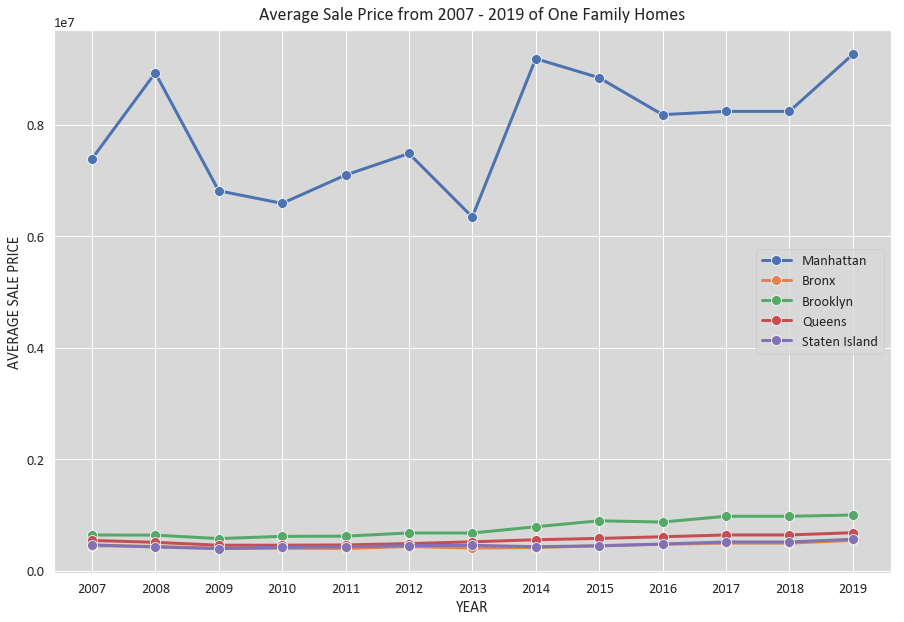

In [6]:
plot_lines_years(onehomedata,boroughs,years, title = 'of One Family Homes' )

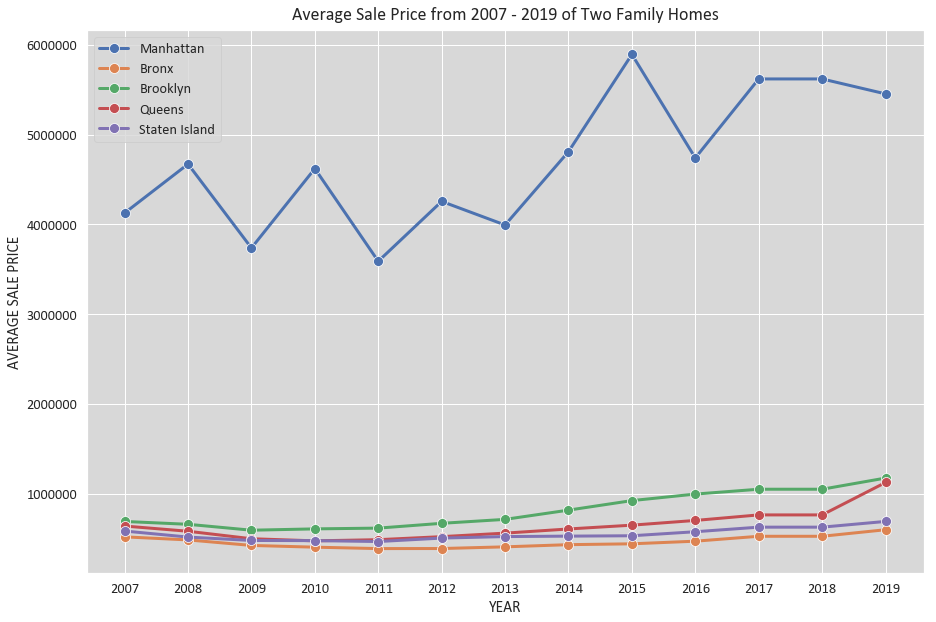

In [7]:
plot_lines_years(twohomedata,boroughs,years,title = "of Two Family Homes")

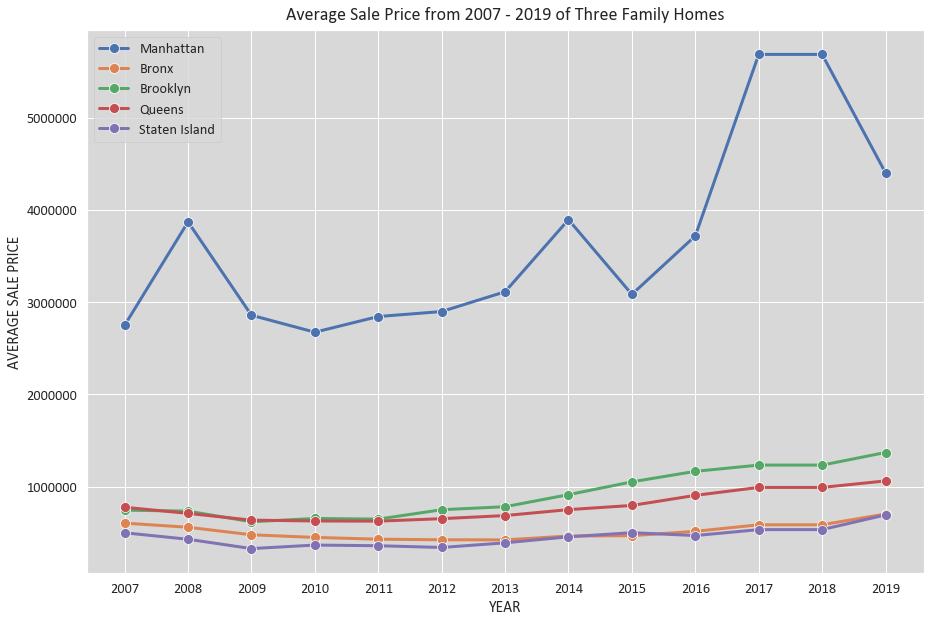

In [8]:
plot_lines_years(threehomedata,boroughs,years, title = "of Three Family Homes")

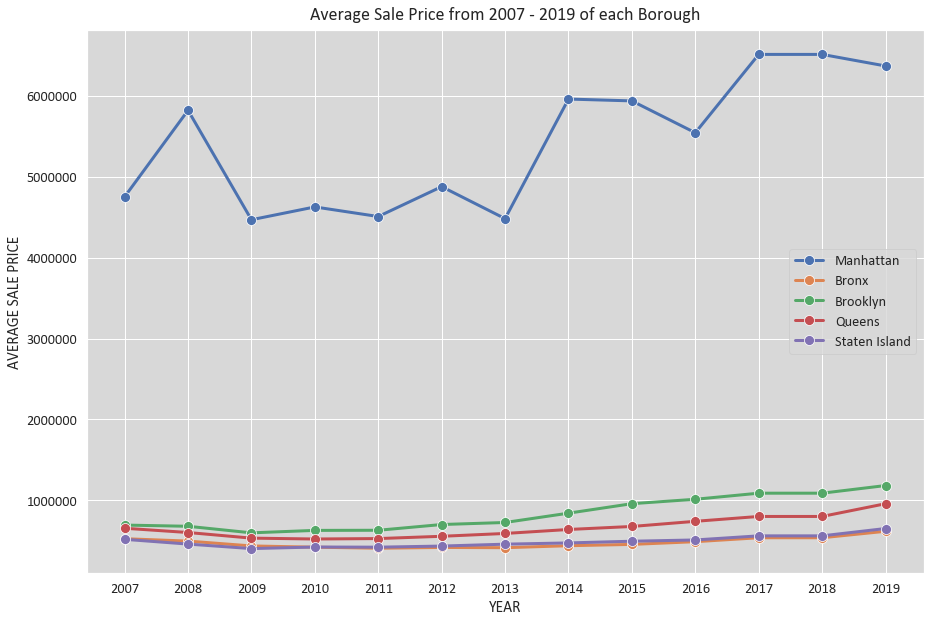

In [9]:
plot_lines_years(yearlysummarydata, boroughs,years,title = 'of each Borough')

<a id='percentincrease'></a>

## Percentage Increase in Average Sale Price per Borough from 2007 to 2019

In [10]:
def plotdouble(borough,barcolor,leftcolor,linecolor):
    data = visualisation_dfs[1]
    data = data.loc[(data['BOROUGH'] == borough)]
    data1 = data.groupby(['YEAR']).mean().reset_index()
    data1['% INCREASE'] = data1['% INCREASE'] * 100

    norm = plt.Normalize(data1['AVERAGE SALE PRICE'].min(), data1['AVERAGE SALE PRICE'].max())
    sm = plt.cm.ScalarMappable(cmap=barcolor, norm=norm)
    sm.set_array([])

    sns.set(style='white', font_scale=1.3, font="calibri", 
            rc={'axes.facecolor':'#d8d8d8'})
    fig,ax1 = plt.subplots(figsize = (15,10))
    sns.barplot(x = 'YEAR', y = 'AVERAGE SALE PRICE', data = data1 , hue = 'AVERAGE SALE PRICE', dodge = False ,palette = barcolor, ax = ax1, ci = None)
    ax2 = ax1.twinx()

    sns.lineplot(x = data1['YEAR'].index, y= data1['% INCREASE'], ax = ax2, color = linecolor)

    ax1.get_legend().remove()
    ax1.figure.colorbar(sm, pad = 0.1,fraction = 0.046)

    ax1.set_xlabel('Year',fontsize = 18)
    ax1.set_ylabel('Average Sale Price',fontsize = 18, color = leftcolor)
    ax2.set_ylabel('Percentage Change',fontsize = 18,color = linecolor)
    plt.title('Average Sale Price & Percentage Increase of ' + borough + ' from 2007 to 2019',fontsize = 20)
    plt.show()


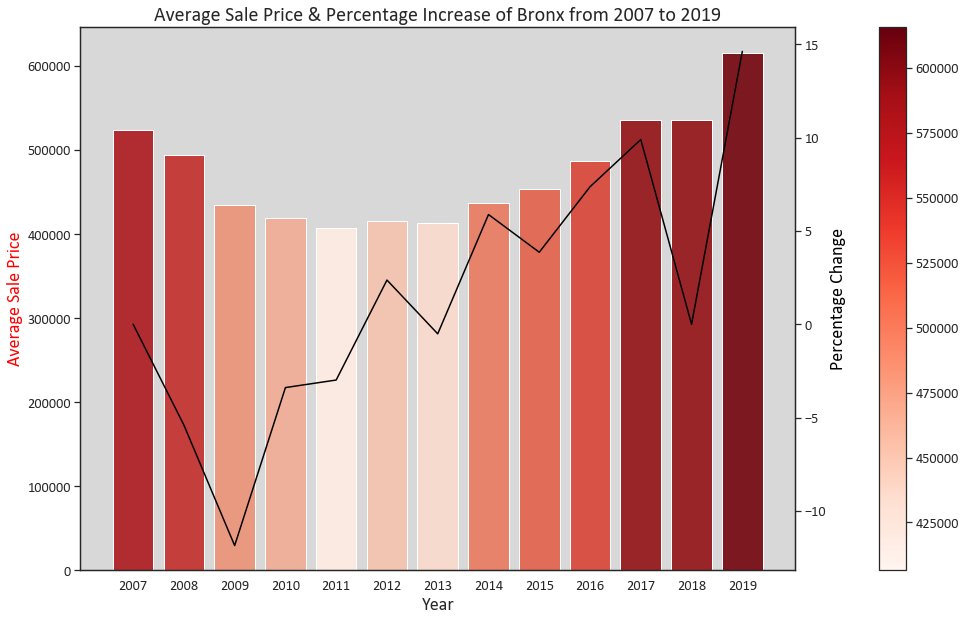

In [11]:
plotdouble('Bronx','Reds', 'Red', 'Black')

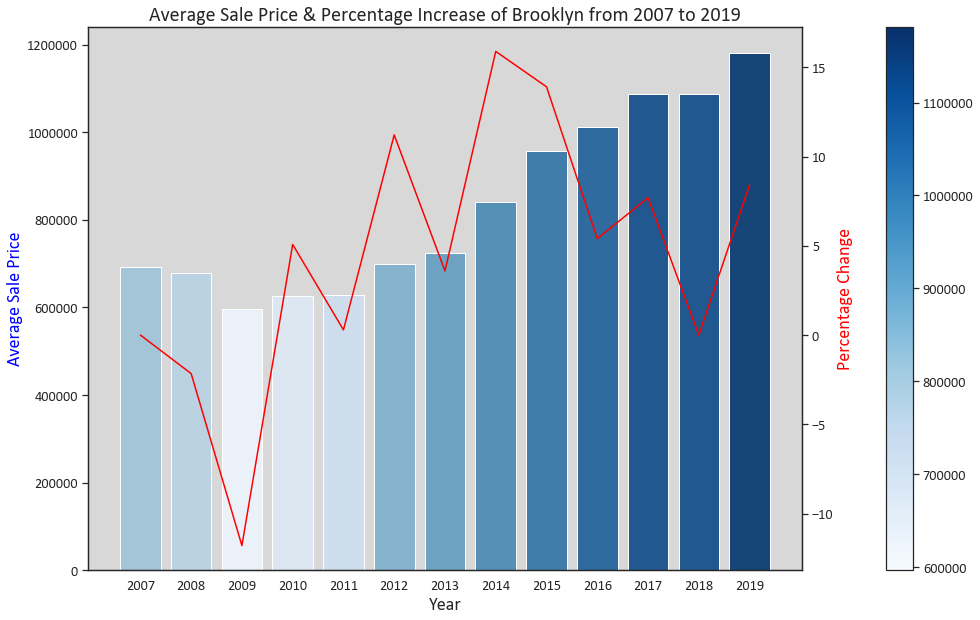

In [12]:
plotdouble('Brooklyn','Blues','Blue','Red')

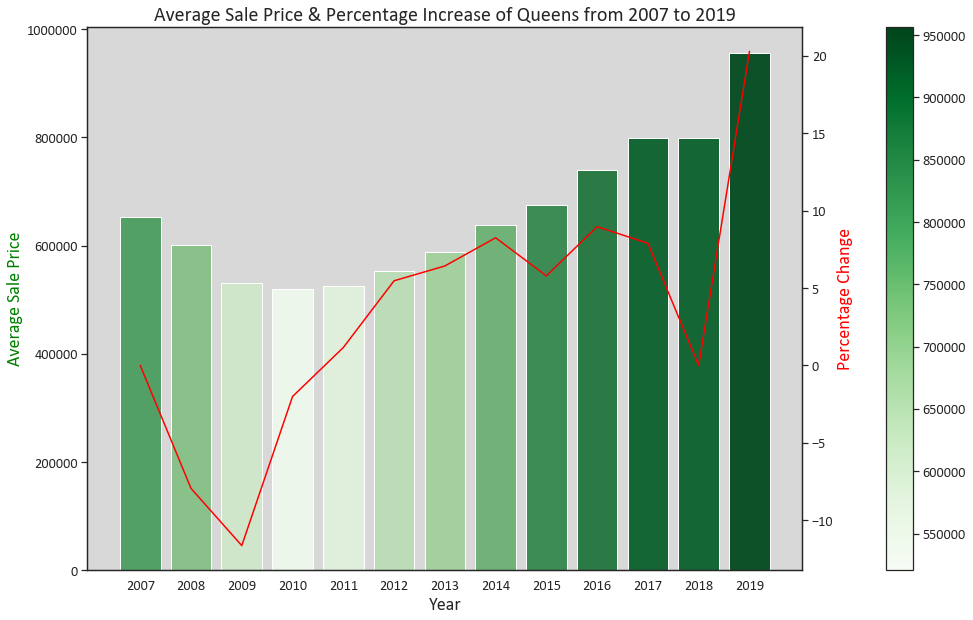

In [13]:
plotdouble('Queens','Greens','Green','Red')

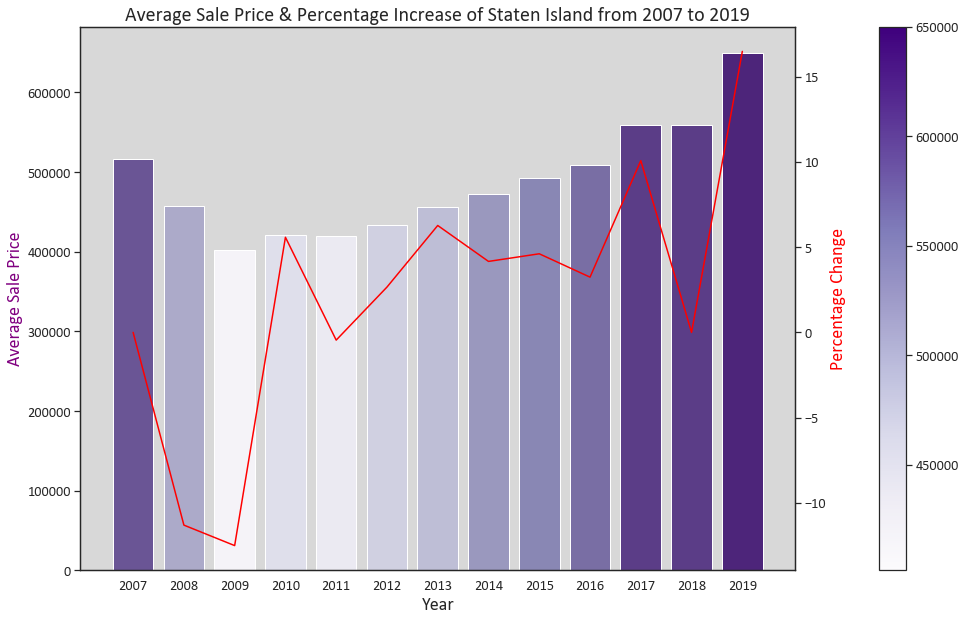

In [14]:
plotdouble('Staten Island','Purples','Purple','Red')

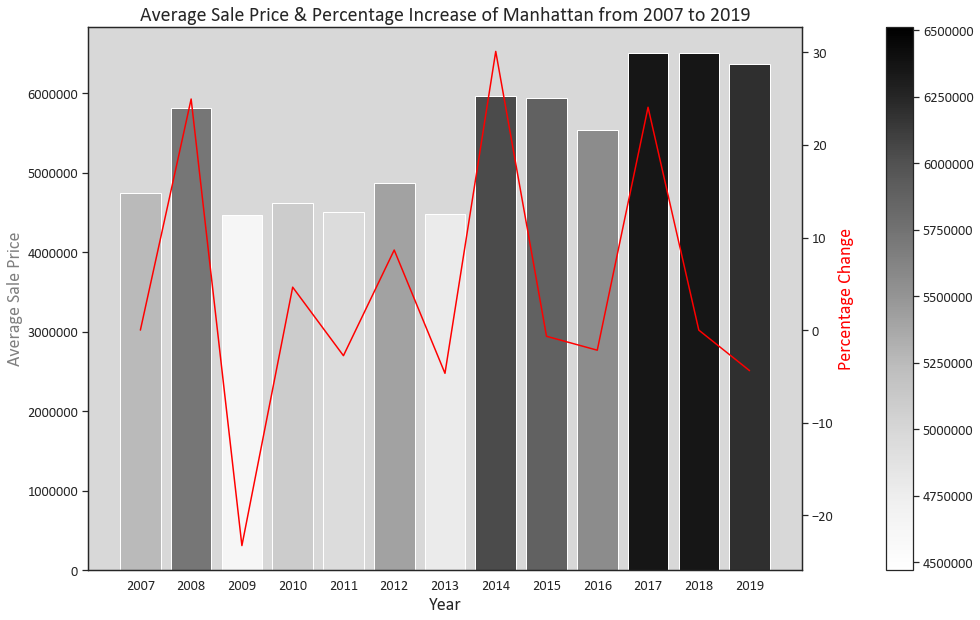

In [15]:
plotdouble('Manhattan','Greys','Grey','Red')


<a id='boroughbarplot'></a>
## Sale Price vs Borough Barplot

In [16]:
df_4yearscombined = visualisation_dfs[0]

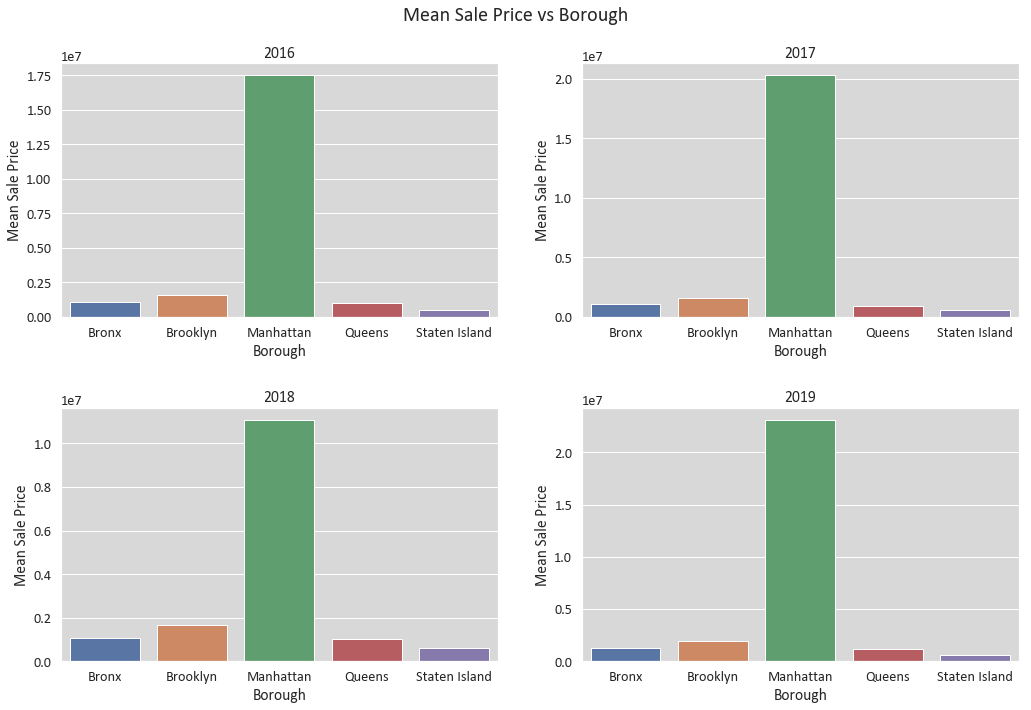

In [17]:

#def sale_borough(data):
sns.set(style='darkgrid', font_scale=1.3, font="calibri", 
        rc={'axes.facecolor':'#d8d8d8'})
years = [2016, 2017, 2018, 2019]
data_year_wise = []
for i in years:
    data_year_wise.append(df_4yearscombined.loc[df_4yearscombined['YEAR'] == i, ['SALE PRICE', 'BOROUGH']])
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15, 10))
for i, j in enumerate(ax.reshape(-1)):
    sns.barplot(x='BOROUGH',
                y='SALE PRICE',
                data=data_year_wise[i],
                ax=j,
                estimator=np.mean,
                ci=None)
    j.title.set_text(str(years[i]))
    j.set_ylabel('Mean Sale Price')
    j.set_xlabel('Borough')
fig.tight_layout(pad=2.0)
plt.suptitle("Mean Sale Price vs Borough", fontsize=20, y=1.01)
plt.show()

## Sale Price vs Borough Boxplot

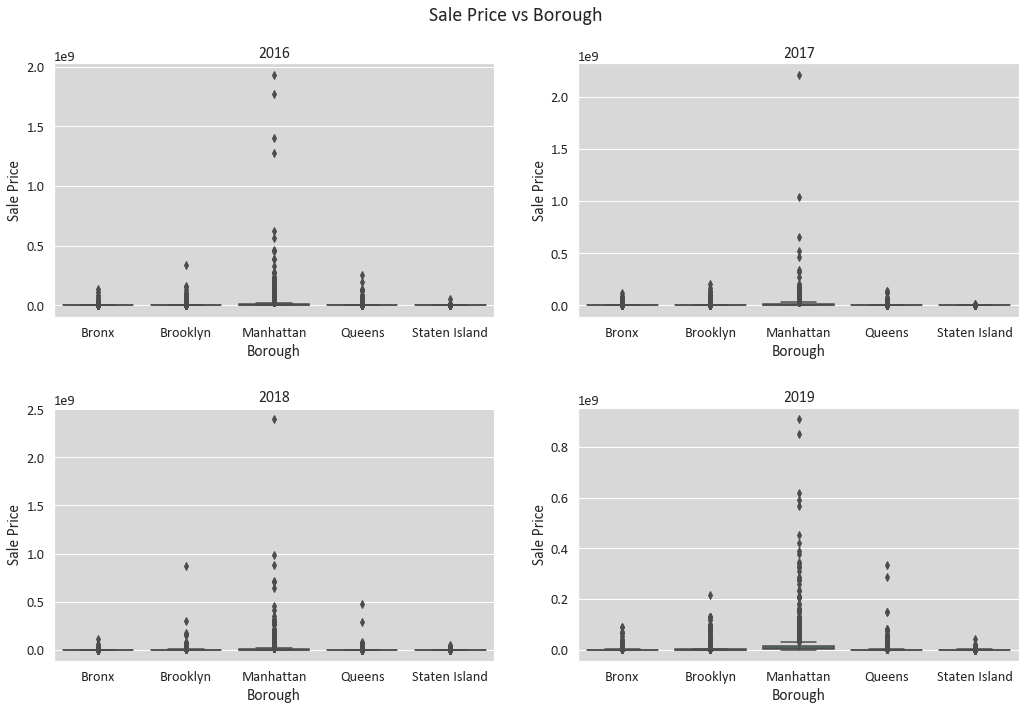

In [18]:
sns.set(style='darkgrid', font_scale=1.3, font="calibri", 
        rc={'axes.facecolor':'#d8d8d8'})
years = [2016, 2017, 2018, 2019]
data_year_wise = []
for i in years:
    data_year_wise.append(df_4yearscombined.loc[df_4yearscombined['YEAR'] == i, ['SALE PRICE', 'BOROUGH']])
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15, 10))
for i, j in enumerate(ax.reshape(-1)):
    sns.boxplot(x='BOROUGH',
                y='SALE PRICE',
                data=data_year_wise[i],
                ax=j)
    j.title.set_text(str(years[i]))
    j.set_ylabel('Sale Price')
    j.set_xlabel('Borough')
fig.tight_layout(pad=2.0)
plt.suptitle("Sale Price vs Borough", fontsize=20, y=1.01)
plt.show()

In [19]:
bronx = df_4yearscombined[df_4yearscombined['BOROUGH'] == 'Bronx']
brooklyn = df_4yearscombined[df_4yearscombined['BOROUGH'] == 'Brooklyn']
queens = df_4yearscombined[df_4yearscombined['BOROUGH'] == 'Queens']
statenisland = df_4yearscombined[df_4yearscombined['BOROUGH'] == 'Staten Island']
manhattan = df_4yearscombined[df_4yearscombined['BOROUGH'] == 'Manhattan']

bronx = bronx['SALE PRICE'].describe()
brooklyn = brooklyn['SALE PRICE'].describe()
queens = queens['SALE PRICE'].describe()
statenisland = statenisland['SALE PRICE'].describe()
manhattan = manhattan['SALE PRICE'].describe()

df10 = pd.DataFrame()
df10 = pd.concat([df10,bronx,brooklyn,queens,statenisland,manhattan],axis = 1,ignore_index = True)
df10.columns= ['Bronx','Brooklyn','Queens','Staten Island','Manhattan']

df10

Bronx      Brooklyn        Queens  Staten Island     Manhattan
25%    3.950000e+05  5.900000e+05  4.650000e+05   3.950000e+05  1.300000e+06
50%    5.250000e+05  9.000000e+05  6.680000e+05   5.168000e+05  3.707500e+06
75%    7.000000e+05  1.450000e+06  9.062740e+05   6.516800e+05  9.600000e+06
count  1.451900e+04  3.464300e+04  4.490400e+04   2.091700e+04  6.068000e+03
max    1.334000e+08  8.696129e+08  4.750000e+08   5.200000e+07  2.397502e+09
mean   1.128478e+06  1.676580e+06  1.021438e+06   5.814295e+05  1.605500e+07
min    1.006000e+03  1.500000e+03  1.041000e+03   1.162000e+03  1.800000e+03
std    3.873449e+06  7.345476e+06  4.816893e+06   8.371688e+05  7.725789e+07

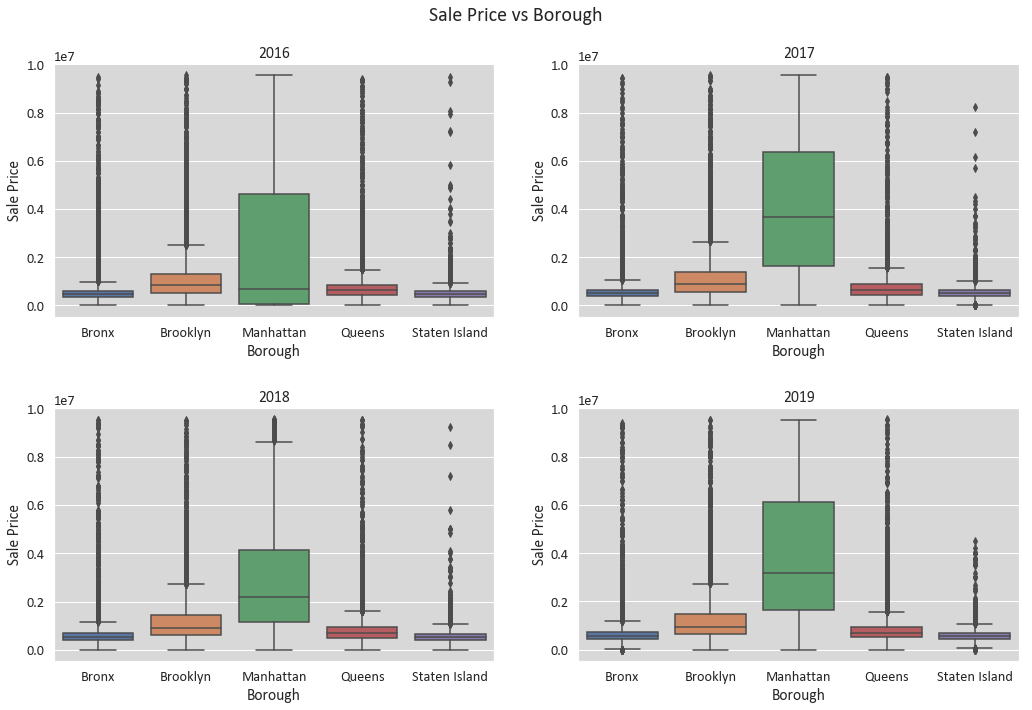

In [20]:
sns.set(style='darkgrid', font_scale=1.3, font="calibri", 
        rc={'axes.facecolor':'#d8d8d8'})

data1 = df_4yearscombined.loc[(df_4yearscombined["SALE PRICE"] < 9600000)]
#data1 = data1[data1['BOROUGH'].isin(['Bronx','Brooklyn','Queens','Staten Island'])]
years = [2016, 2017, 2018, 2019]
data_year_wise = []
for i in years:
    data_year_wise.append(data1.loc[data1['YEAR'] == i, ['SALE PRICE', 'BOROUGH']])
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15, 10))
for i, j in enumerate(ax.reshape(-1)):
    sns.boxplot(x='BOROUGH',
                y='SALE PRICE',
                data=data_year_wise[i],
                ax=j)
    j.title.set_text(str(years[i]))
    j.set_ylabel('Sale Price')
    j.set_xlabel('Borough')
fig.tight_layout(pad=2.0)
plt.suptitle("Sale Price vs Borough", fontsize=20, y=1.01)
plt.show()

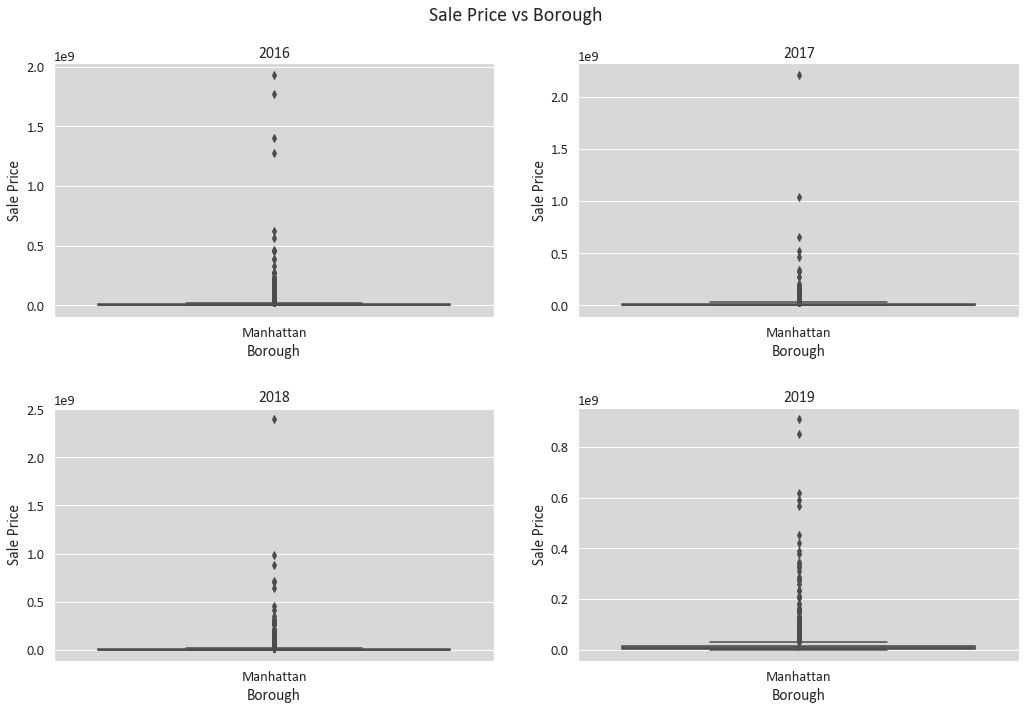

In [21]:
sns.set(style='darkgrid', font_scale=1.3, font="calibri", 
        rc={'axes.facecolor':'#d8d8d8'})

#data2 = df_4yearscombined.loc[(df_4yearscombined["SALE PRICE"] < 20000000)]
data2 = df_4yearscombined[df_4yearscombined['BOROUGH'].isin(['Manhattan'])]
years = [2016, 2017, 2018, 2019]
data_year_wise = []
for i in years:
    data_year_wise.append(data2.loc[data2['YEAR'] == i, ['SALE PRICE', 'BOROUGH']])
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15, 10))
for i, j in enumerate(ax.reshape(-1)):
    sns.boxplot(x='BOROUGH',
                y='SALE PRICE',
                data=data_year_wise[i],
                ax=j)
    j.title.set_text(str(years[i]))
    j.set_ylabel('Sale Price')
    j.set_xlabel('Borough')
fig.tight_layout(pad=2.0)
plt.suptitle("Sale Price vs Borough", fontsize=20, y=1.01)
plt.show()

<a id='land'></a>

## Sale Price vs Land Square Feet Scatterplot

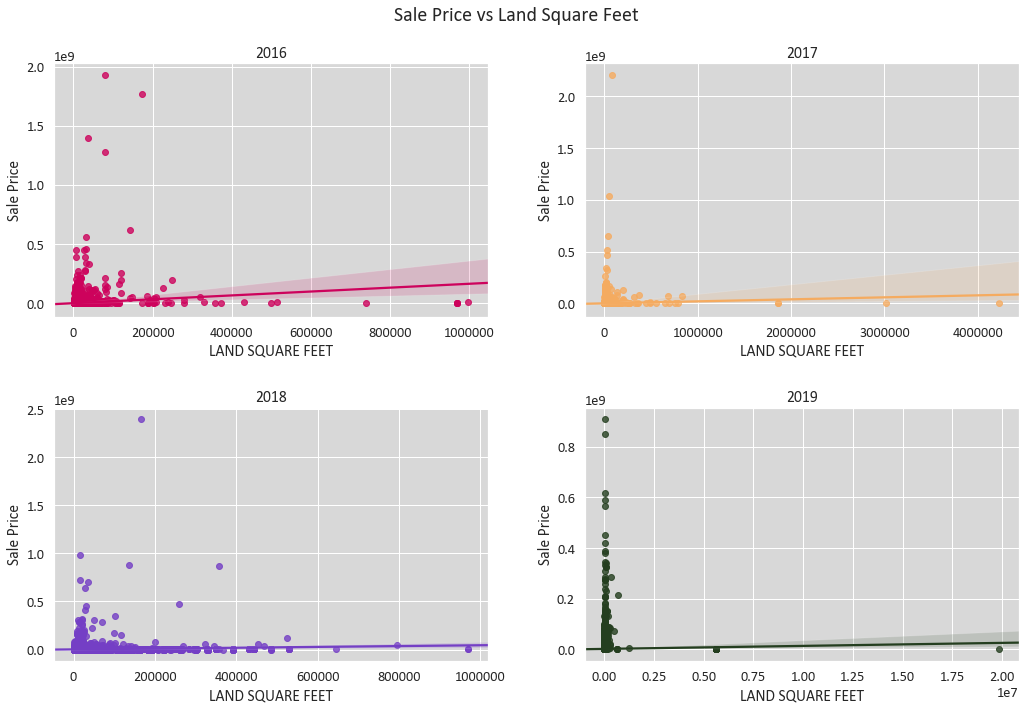

In [22]:
#def sale_land(data):
sns.set(style='darkgrid', font_scale=1.3, font="calibri", 
        rc={'axes.facecolor':'#d8d8d8'})
years = [2016, 2017, 2018, 2019]
colors_ = ['#cd025c', '#f5ab60', '#743fc5', '#243e1f']
data_year_wise = []
for i in years:
    data_year_wise.append(df_4yearscombined.loc[df_4yearscombined['YEAR'] == i, ['SALE PRICE', 'LAND SQUARE FEET']])
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15, 10))
for i, j in enumerate(ax.reshape(-1)):
    sns.regplot(x='LAND SQUARE FEET',
                y='SALE PRICE',
                data=data_year_wise[i],
                ax=j,
                color=colors_[i])
    j.title.set_text(str(years[i]))
    j.set_ylabel('Sale Price')
    j.set_xlabel('LAND SQUARE FEET')
fig.tight_layout(pad=2.0)
plt.suptitle("Sale Price vs Land Square Feet", fontsize=20, y=1.01)
plt.show()


<a id='taxclass'></a>

## Sale Price vs Tax Class

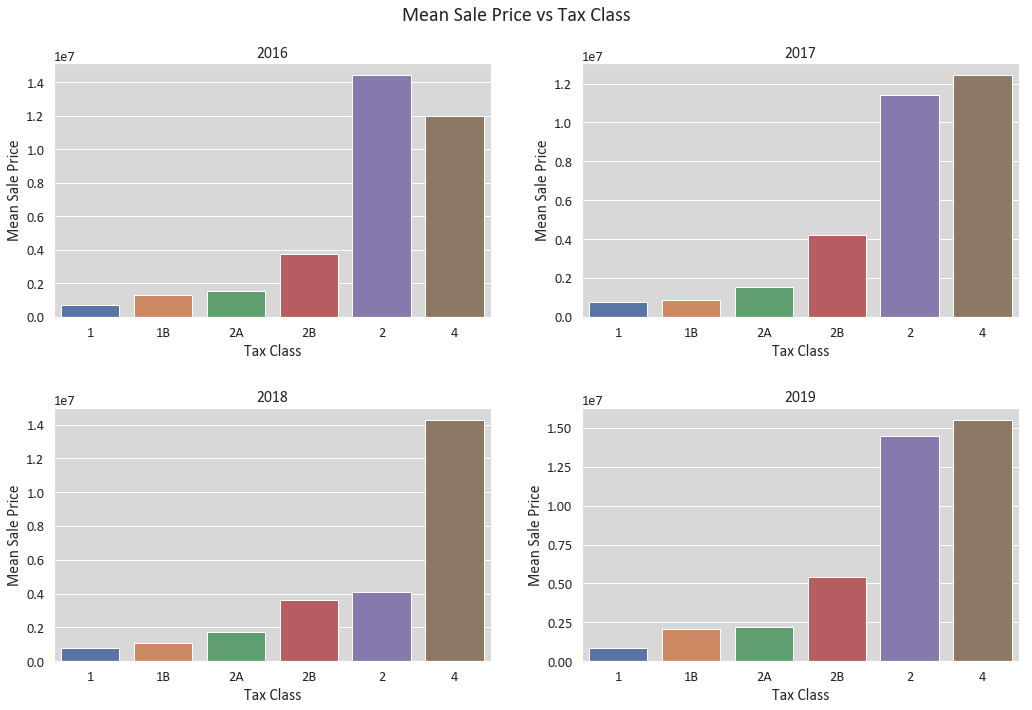

In [23]:
sns.set(style='darkgrid', font_scale=1.3, font="calibri", 
        rc={'axes.facecolor':'#d8d8d8'})
years = [2016, 2017, 2018, 2019]
data_year_wise = []
for i in years:
    data_year_wise.append(df_4yearscombined.loc[df_4yearscombined['YEAR'] == i, ['SALE PRICE', 'TAX CLASS']])
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15, 10))
for i, j in enumerate(ax.reshape(-1)):
    sns.barplot(x='TAX CLASS',
                y='SALE PRICE',
                data=data_year_wise[i],
                ax=j,
                order = ['1','1B','2A','2B','2','4'],
                estimator=np.mean,
                ci=None)
    j.title.set_text(str(years[i]))
    j.set_ylabel('Mean Sale Price')
    j.set_xlabel('Tax Class')
fig.tight_layout(pad=2.0)
plt.suptitle("Mean Sale Price vs Tax Class", fontsize=20, y=1.01)
plt.show()


<a id='yearbuilt'></a>



## Sale Price vs Year Built

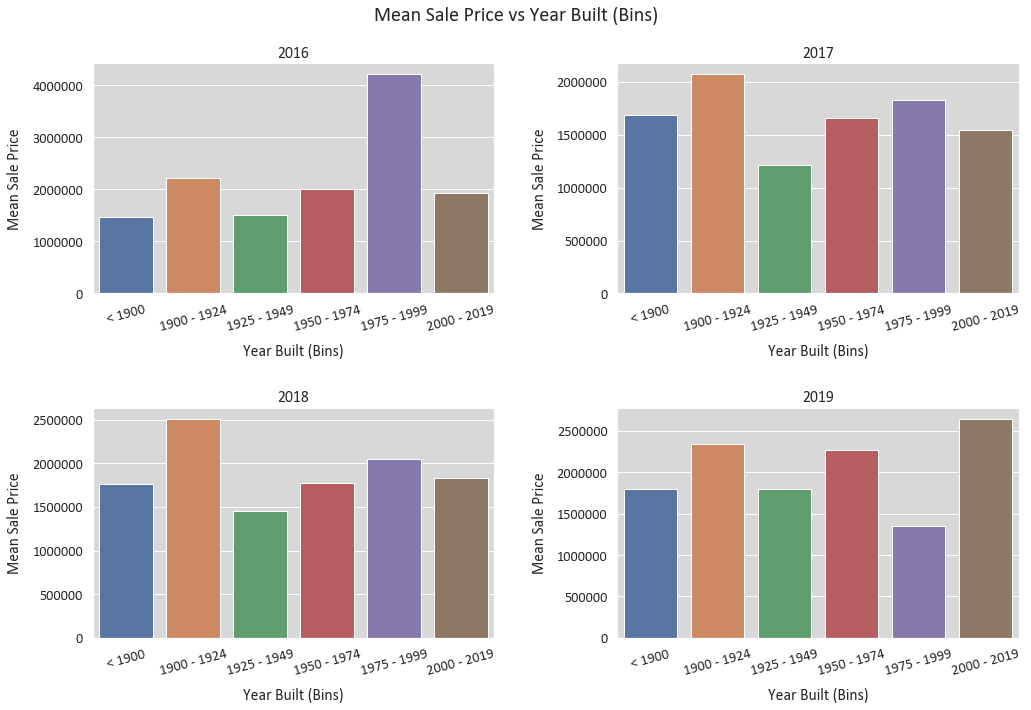

In [24]:
sns.set(style='darkgrid', font_scale=1.3, font="calibri", 
        rc={'axes.facecolor':'#d8d8d8'})
years = [2016, 2017, 2018, 2019]
data_year_wise = []
for i in years:
    data_year_wise.append(df_4yearscombined.loc[df_4yearscombined['YEAR'] == i, ['SALE PRICE', 'YEAR BUILT (Bins)']])
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15, 10))
for i, j in enumerate(ax.reshape(-1)):
    sns.barplot(x='YEAR BUILT (Bins)',
                y='SALE PRICE',
                data=data_year_wise[i],
                order = ['< 1900', '1900 - 1924', '1925 - 1949', '1950 - 1974','1975 - 1999','2000 - 2019'],
                ax=j,
                estimator = np.mean,
                ci=None)
    j.title.set_text(str(years[i]))
    j.set_ylabel('Mean Sale Price', labelpad=10)
    j.set_xlabel('Year Built (Bins)', labelpad=10)
    j.set_xticklabels(j.get_xticklabels(), rotation=15)
fig.tight_layout(pad=2.0)
plt.suptitle("Mean Sale Price vs Year Built (Bins)", fontsize=20, y=1.01)
plt.show()

###     


<a id='neighbourhood'></a>


## Sale Price vs Neighbourhoods in Each Borough


In [25]:
neighbourhood = df_4yearscombined[['SALE PRICE', 'YEAR','NEIGHBORHOOD','BOROUGH']]
neighbourhood = neighbourhood.loc[(neighbourhood['YEAR'] == 2019)]
neighbourhood = neighbourhood.sort_values(['BOROUGH'], ascending = True) 

In [26]:
boroughs = neighbourhood['BOROUGH'].unique() #unique values given are in order of the datafile and we have checked thus reason why we sorted earlier

data_borough_wise = []
for i in boroughs:
    data_borough_wise.append(neighbourhood.loc[neighbourhood['BOROUGH'] == i, ['SALE PRICE', 'NEIGHBORHOOD']])


def neighbourhood_plot(data,i,title): #function to plot the neighbourhood barplots
    sns.set(style='darkgrid', font_scale=1.3, font="calibri", 
            rc={'axes.facecolor':'#d8d8d8'})

    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15, 10))

    sns.barplot(x='NEIGHBORHOOD',
                y='SALE PRICE',
                data=data[i],
                estimator = np.mean,
                ci=None)

    ax.set_ylabel('Mean Sale Price', labelpad=10)
    ax.set_xlabel('Neighbourhoods', labelpad=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize = 14)
    fig.tight_layout(pad=2.0)
    plt.suptitle("Mean Sale Price vs Neighbourhoods in " + title , fontsize=20, y=1.01)
    meanvalue = data[i]['SALE PRICE'].mean()
    plt.axhline(y=meanvalue)
    ax.legend(['Mean Sale Price in ' + title])
    plt.show()

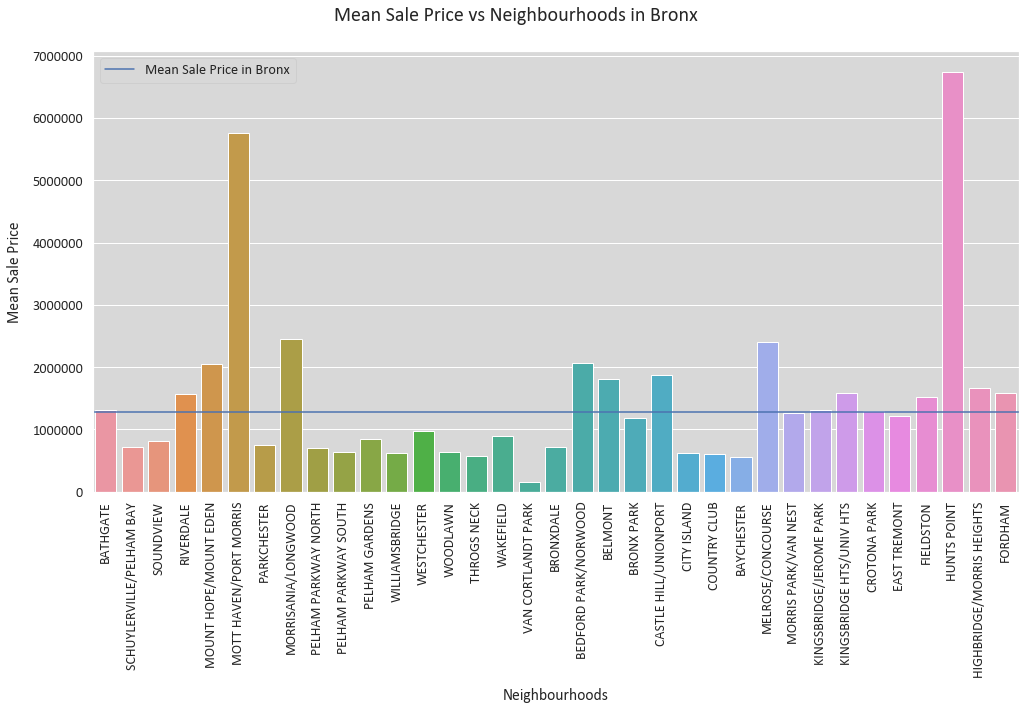

In [27]:
neighbourhood_plot(data_borough_wise,0,"Bronx")

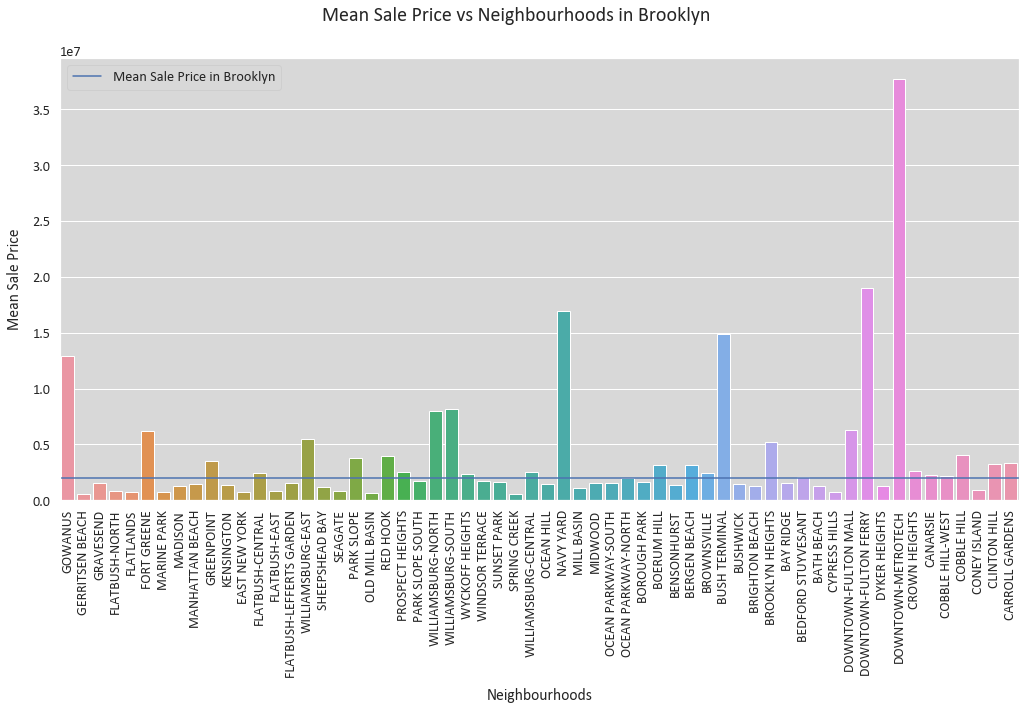

In [28]:
neighbourhood_plot(data_borough_wise,1,"Brooklyn")

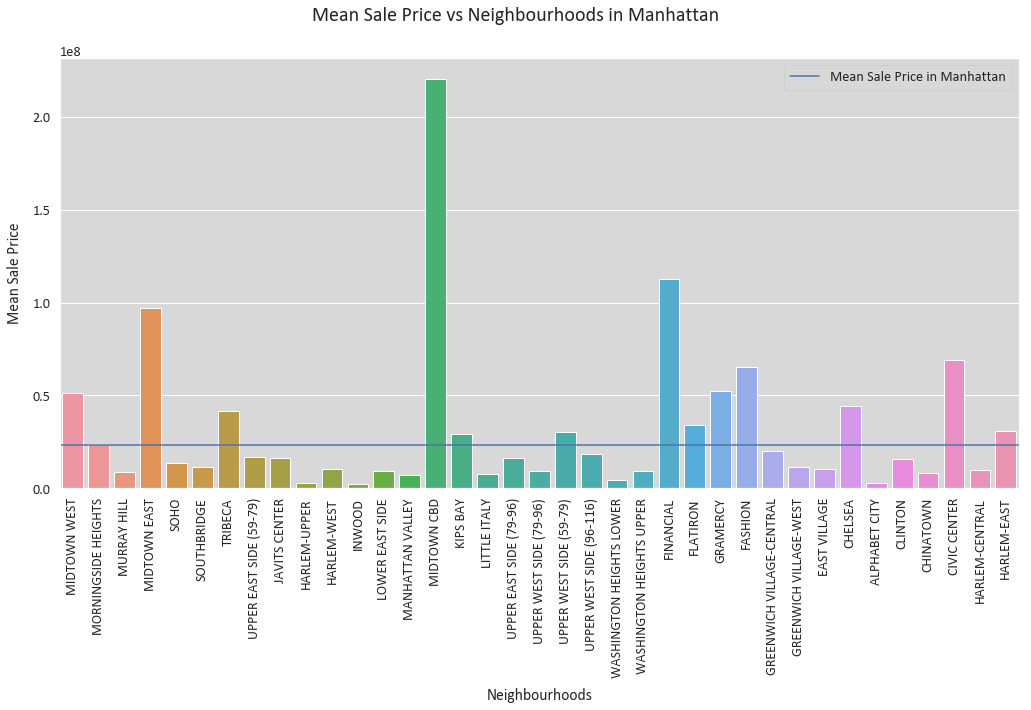

In [29]:
neighbourhood_plot(data_borough_wise,2,"Manhattan")

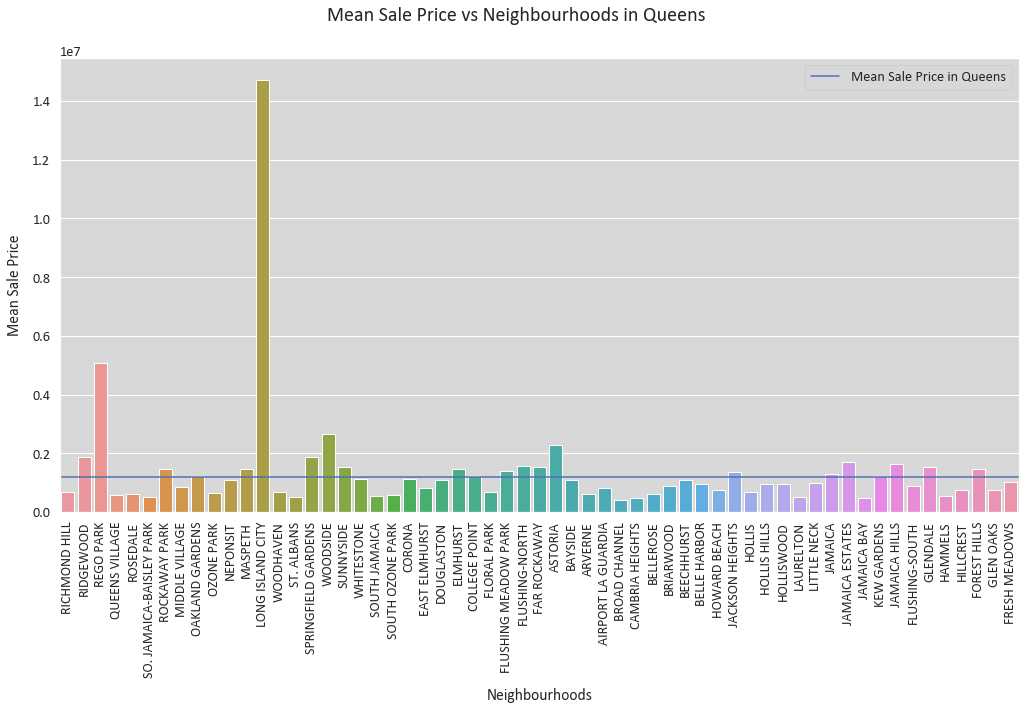

In [30]:
neighbourhood_plot(data_borough_wise,3,"Queens")

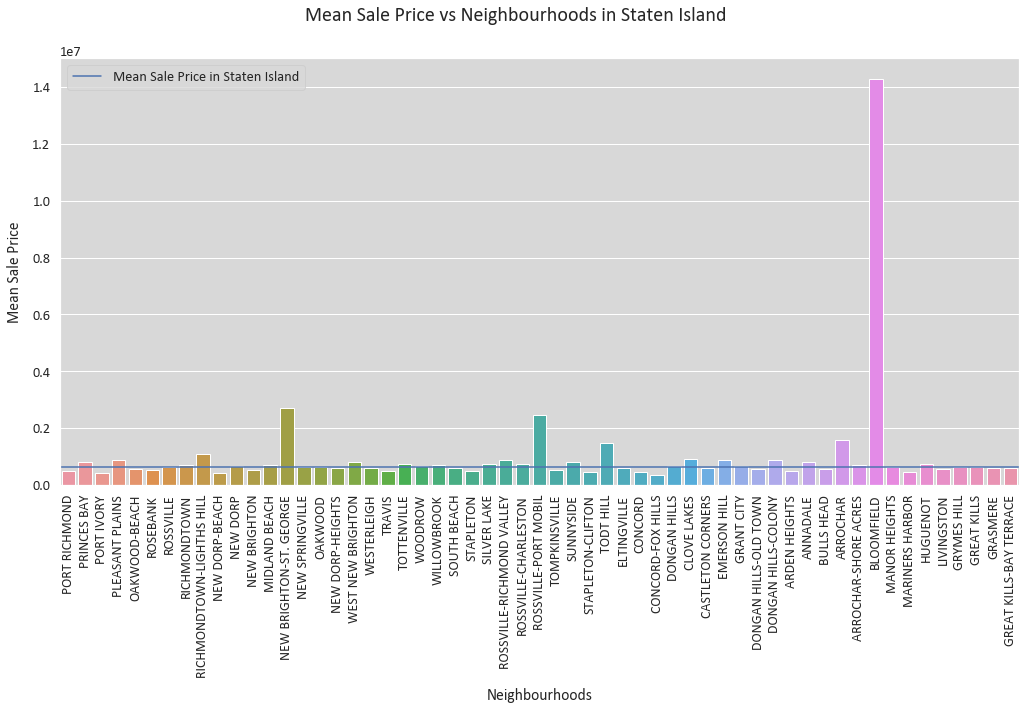

In [31]:
neighbourhood_plot(data_borough_wise,4,"Staten Island")

###  


<a id='school'></a>

## Public High School Data

##  

In [32]:
highschooldata = visualisation_dfs[7]
highschooldata['Schools per Land Size'] = highschooldata['Number of Schools']/highschooldata['Land Size']

In [33]:
highschooldata

Borough  Number of Schools  Land Size  Schools per Land Size
0          Bronx                118     109.04               1.082172
1       Brooklyn                121     183.42               0.659688
2      Manhattan                106      59.13               1.792660
3         Queens                 80     281.09               0.284606
4  Staten Island                 10     151.18               0.066146

## Number of Public High Schools per Borough Barplot

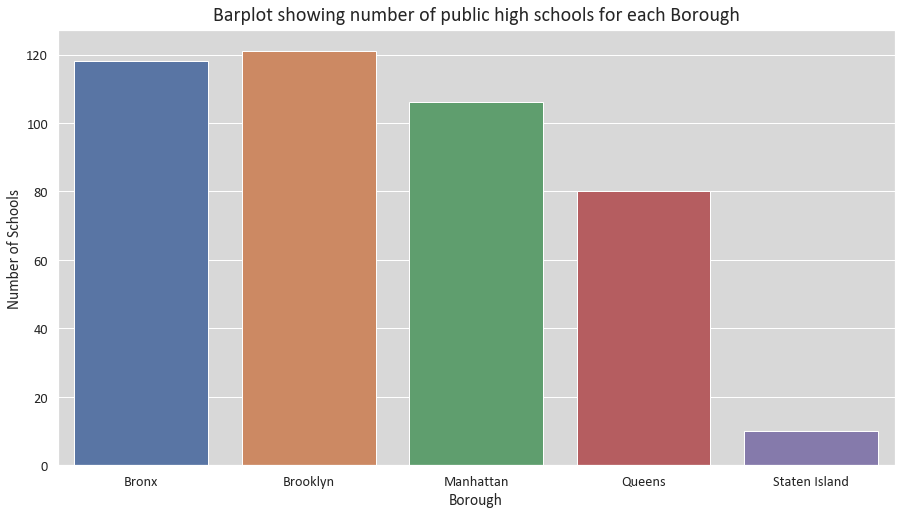

In [34]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Borough',
            y='Number of Schools',
            data=highschooldata)
plt.title("Barplot showing number of public high schools for each Borough",
         pad=10,
         fontsize=20)
plt.show()

##   

## Schools per km^2 per Borough Barplot

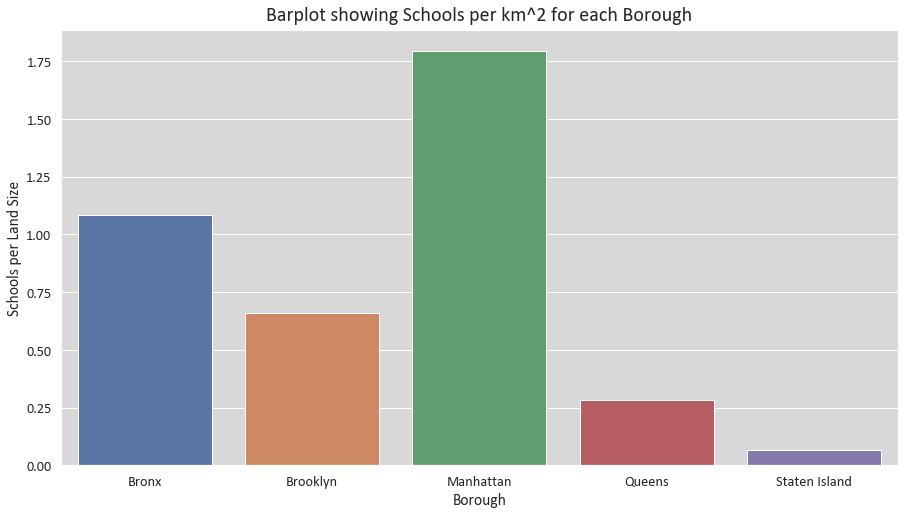

In [35]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Borough',
            y='Schools per Land Size',
            data=highschooldata)
plt.title("Barplot showing Schools per km^2 for each Borough",
         pad=10,
         fontsize=20)
plt.show()

In [36]:
pop = visualisation_dfs[8]
pop1 = pop.loc[(pop['Age Group'] == 'School-Age (5 to17) ')]
pop1 = pop1[['Borough','2020']]
pop1.columns = ['Borough','Student Population']

highschooldata = pd.merge(highschooldata,pop1,on ='Borough')

highschooldata['Schools per Student Population'] = highschooldata['Number of Schools']/highschooldata['Student Population']

In [37]:
highschooldata

Borough  Number of Schools  Land Size  Schools per Land Size  \
0          Bronx                118     109.04               1.082172   
1       Brooklyn                121     183.42               0.659688   
2      Manhattan                106      59.13               1.792660   
3         Queens                 80     281.09               0.284606   
4  Staten Island                 10     151.18               0.066146   

   Student Population  Schools per Student Population  
0              259013                        0.000456  
1              441049                        0.000274  
2              162931                        0.000651  
3              341062                        0.000235  
4               78759                        0.000127


<a id='schperstudent'></a>

##    

## Schools per Student Population per Borough Barplot

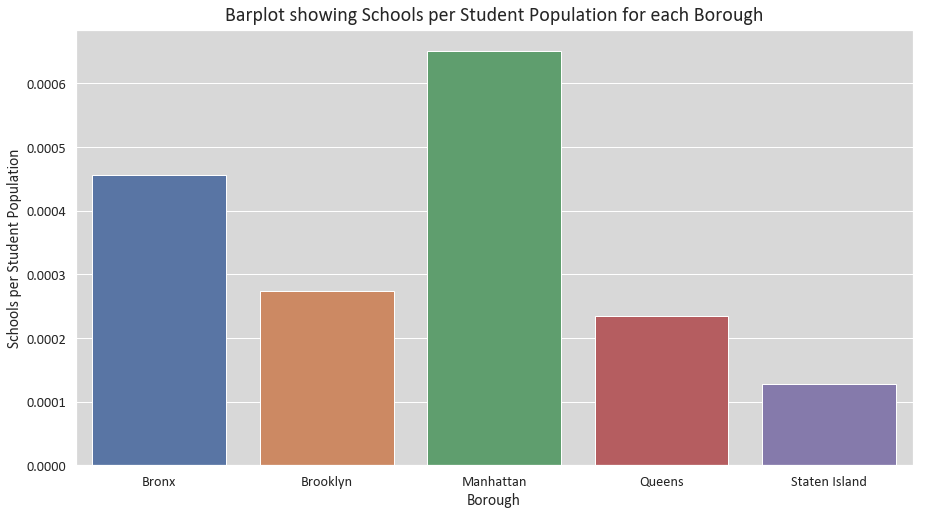

In [38]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Borough',
            y='Schools per Student Population',
            data=highschooldata)
plt.title("Barplot showing Schools per Student Population for each Borough",
         pad=10,
         fontsize=20)
plt.show()


<a id='satscore'></a>



##     

## Average SAT Scores per Borough Boxplot

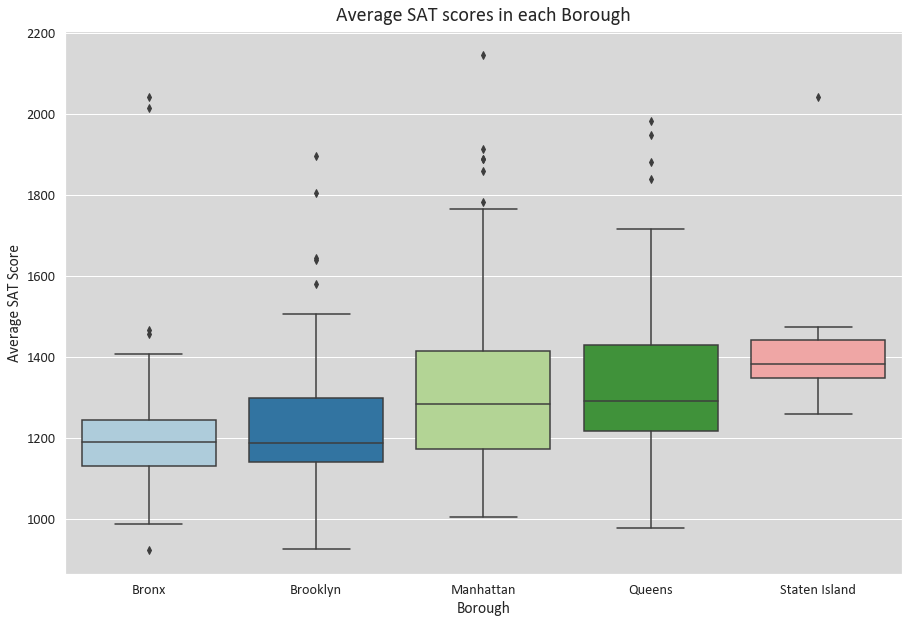

In [39]:
satscores = visualisation_dfs[4]


plt.figure(figsize=(15, 10))
sns.boxplot(x='Borough',
        y='Average SAT Score',
        data=satscores, palette='Paired', order = ['Bronx','Brooklyn','Manhattan','Queens','Staten Island'])
plt.title("Average SAT scores in each Borough", pad=10, fontsize=20)
plt.show()

In [40]:
lat_long = visualisation_dfs[4]
lat_long = lat_long[['Latitude',  'Longitude', 'School Name', 'Borough']]
lat_long = lat_long.dropna() #incase there is NA

In [76]:

borough_poly = gpd.read_file("C:/Users/ChengYao/Desktop/DAO2702/Project/Clean Data/Borough Boundaries.geojson")
lat_long.head(3)

Latitude  Longitude                                        School Name  \
0  40.75321  -73.99786                 Clinton School Writers and Artists   
1  40.86605  -73.92486  Inwood Early College for Health and Informatio...   
2  40.71873  -73.97943  New Explorations into Science, Technology and ...   

     Borough  
0  Manhattan  
1  Manhattan  
2  Manhattan


<a id='mapsch'></a>

##    
## Clustered Marker Map of Schools in NYC

In [77]:
map_markers = folium.Map(location=[40.75321, -73.99786], zoom_start=10)
marker_cluster_school = MarkerCluster().add_to(map_markers)

for i in range(0, len(lat_long)):
    folium.Marker(lat_long.iloc[i, :2].tolist(), 
                  popup=lat_long.iloc[i,2] + '<br>' + '<b>' + lat_long.iloc[i,3] + '<b>')\
                .add_to(marker_cluster_school)
folium.GeoJson(borough_poly['geometry'][0]).add_to(map_markers)
folium.GeoJson(borough_poly['geometry'][1]).add_to(map_markers)
folium.GeoJson(borough_poly['geometry'][2]).add_to(map_markers)
folium.GeoJson(borough_poly['geometry'][3]).add_to(map_markers)
folium.GeoJson(borough_poly['geometry'][4]).add_to(map_markers)

map_markers

###   


<a id='ratsightings'></a>


## Rat Sightings

In [78]:
rats = visualisation_dfs[5]


rats1 = rats['Borough'].value_counts().reset_index() #calculate number of sightings per borough
rats1.columns = ['Borough', 'Total Number of Rat Sightings']


<a id='ratsbar'></a>

## Number of Rat Sightings per Borough Barplot

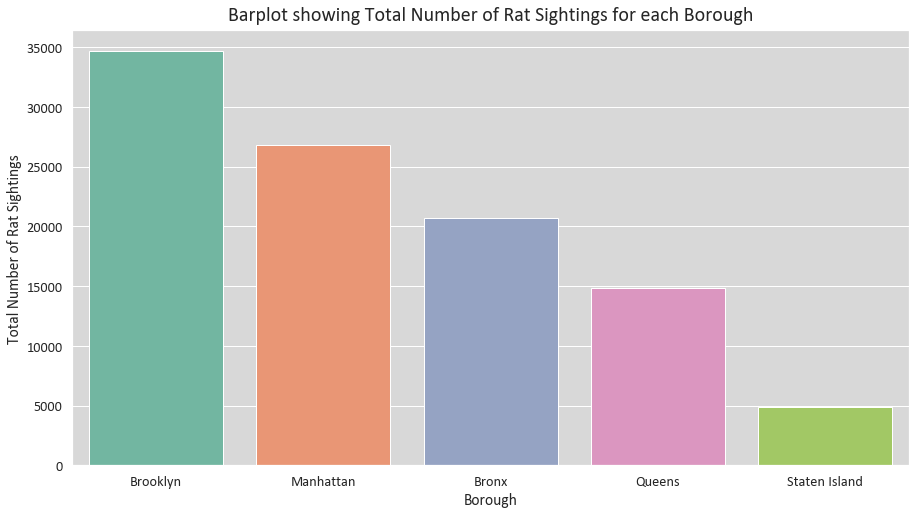

In [79]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Borough',
            y='Total Number of Rat Sightings',
            data=rats1, palette='Set2')
plt.title("Barplot showing Total Number of Rat Sightings for each Borough", 
          pad=10, fontsize=20)
plt.show()


<a id='ratsbar1'></a>


##    
## Average Number of Sightings per km^2 per Borough Barplot

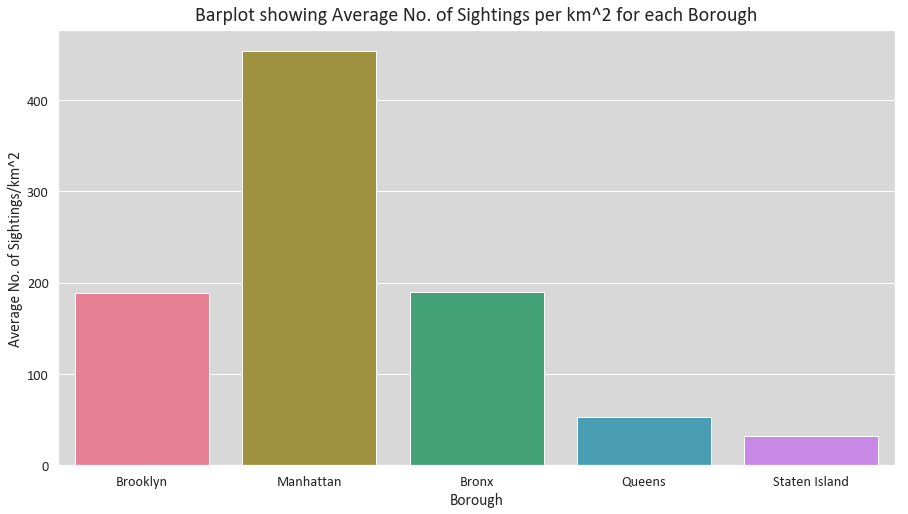

In [80]:
rats2 = visualisation_dfs[6]

plt.figure(figsize=(15, 8))
sns.barplot(x='Borough',
            y='Average No. of Sightings/km^2',
            order = ['Brooklyn','Manhattan','Bronx','Queens','Staten Island'],
            data=rats2, palette='husl')
plt.title("Barplot showing Average No. of Sightings per km^2 for each Borough", 
          pad=10, fontsize=20)
plt.show()


<a id='heatmap'></a>


## Rat Sightings Heatmap in NYC

In [1]:
m = folium.Map([40.75321, -73.99786], zoom_start=10)

heat_arr = rats.dropna(subset=['Latitude', 'Longitude'])
heat_arr = heat_arr[['Latitude', 'Longitude']]

steps=20
colormap = branca.colormap.linear.YlOrRd_09.scale(0, 1).to_step(steps)
gradient_map=defaultdict(dict)
for i in range(steps):
    gradient_map[1/steps*i] = colormap.rgb_hex_str(1/steps*i)
colormap.add_to(m) #add color bar at the top of the map

# plot heatmap
m.add_children(HeatMap(heat_arr, radius=9,gradient = gradient_map))
folium.GeoJson(borough_poly['geometry'][0]).add_to(m)
folium.GeoJson(borough_poly['geometry'][1]).add_to(m)
folium.GeoJson(borough_poly['geometry'][2]).add_to(m)
folium.GeoJson(borough_poly['geometry'][3]).add_to(m)
folium.GeoJson(borough_poly['geometry'][4]).add_to(m)
m

NameError: name 'folium' is not defined


<div>
<img src="img/borough.jpg" width="350"/>
</div>

## Rat Sightings Google HeatMap

In [82]:
gmaps.configure(api_key = 'x')  #removed my Google API key as it is private
m1 = gmaps.figure(center = (40.730610, -73.935242), zoom_level = 10)
m1.add_layer(gmaps.heatmap_layer(heat_arr))
m1

Figure(layout=FigureLayout(height='420px'))

### ###The graph doesn't show in HTML but it will run in Jupyter###


<a id='population'></a>

##   

## Population Data


### Next we want to see the population distribution in each borough and the projected population over the next 2 decades

In [83]:
pop = visualisation_dfs[8]
pop1 = pop.iloc[:,[0,1,2,4,6,8]]

In [84]:
def plotpopulation(lst,j,title = ''):
    barWidth = 0.25
    
    bars1 = pop1.iloc[lst[0],2:].tolist()
    bars2 = pop1.iloc[lst[1],2:].tolist()
    bars3 = pop1.iloc[lst[2],2:].tolist()

    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]

    j.bar(r1, bars1, color='#6497b1', width=barWidth, edgecolor='white', label='Total Population')
    j.bar(r2, bars2, color='#35b899', width=barWidth, edgecolor='white', label='Student Population (5 - 17)')
    j.bar(r3, bars3, color='#b3c0e2', width=barWidth, edgecolor='white', label='Elderly ( >= 65 )')
    
    j.title.set_text(title)
    j.set_xlabel('Years')
    j.set_ylabel('Number in Population')
    j.set_xticklabels(['dummy','       2010','       2020','       2030','       2040'])





## Population Growth Per Borough Grouped Barplot

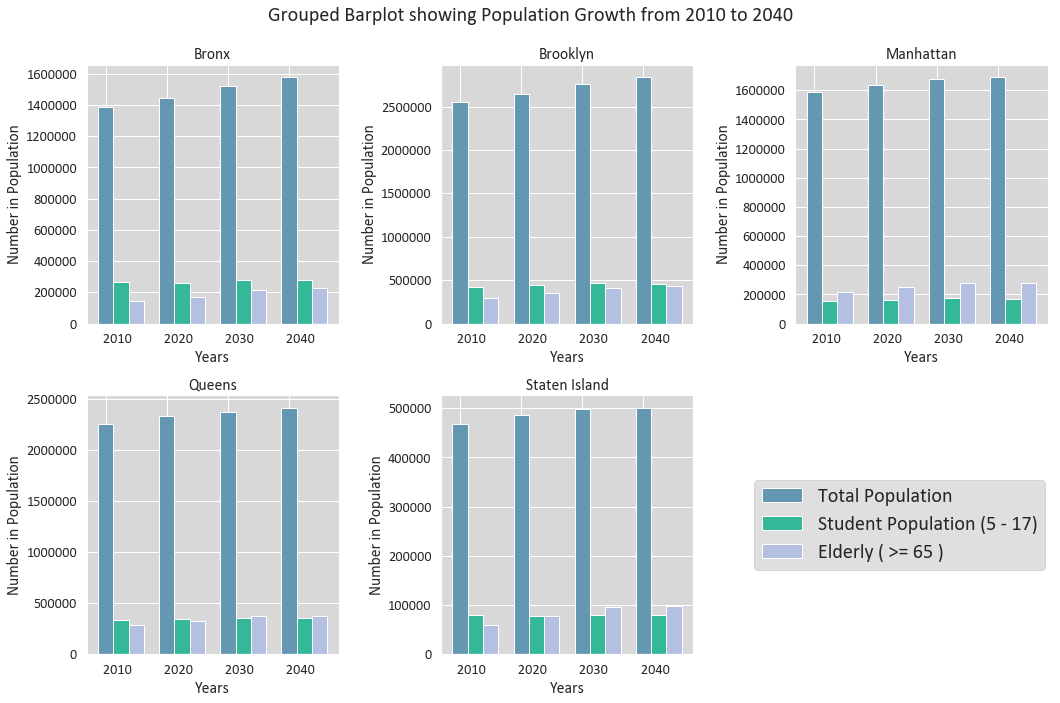

In [85]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(15, 10))
fig.delaxes(ax[1,2])
ax = ax.reshape(-1)

bronx,brooklyn,manhattan,queens,statenisland = [1,7,13],[2,8,14],[3,9,15],[4,10,16],[5,11,17]
total = [bronx,brooklyn,manhattan,queens,statenisland]
boroughslst = boroughs.tolist() #defined earlier above

for i,j in enumerate(ax[:-1]):
    plotpopulation(total[i],j,title = boroughslst[i])
    

plt.suptitle("Grouped Barplot showing Population Growth from 2010 to 2040", fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top = 0.9)
ax[4].legend(loc='center left', bbox_to_anchor=(1.2, 0.5),prop={'size':20})
plt.show()




##  

## Crime Data

In [86]:
crimes = visualisation_dfs[2]
meancrimes = visualisation_dfs[3]


<a id='lineplot1crime'></a>



## Total Number of Crimes from 1990 to 2018 for all 5 Boroughs Lineplot

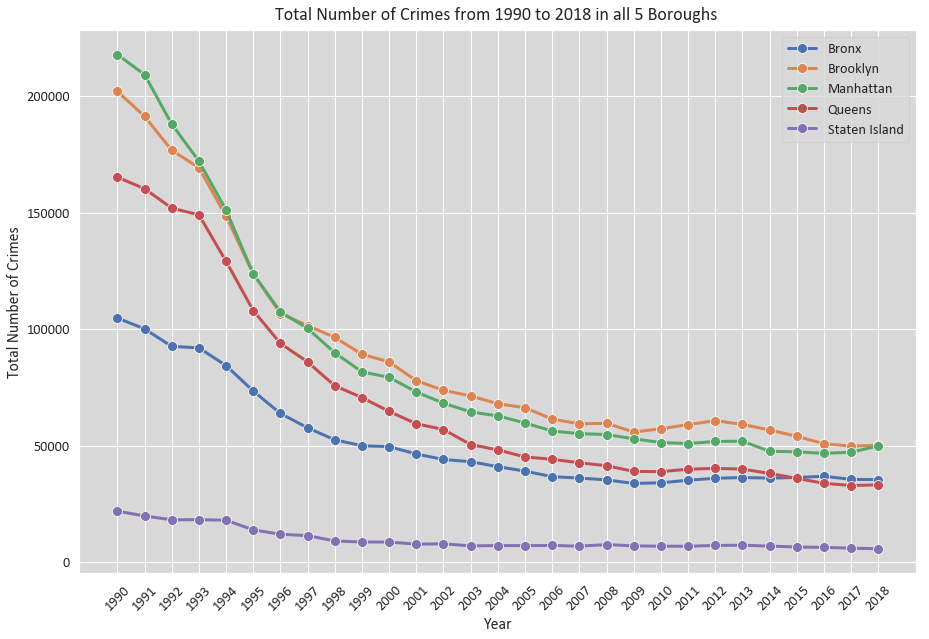

In [87]:
sns.set(style='darkgrid', font_scale=1.3, font="calibri", 
        rc={'axes.facecolor':'#d8d8d8'})
years = crimes['Year'].unique()
years_str = list(map(str, years))
plt.figure(figsize=(15,10))
for i in boroughs:
    sns.lineplot(y = 'Index Total', x = 'Year',
                 data = crimes.groupby(['Borough','Year']).mean().loc[i].reset_index(), 
                 label=i,lw=3,marker='o',ms=10) ##this doesn't get the mean since every year only has one value. I did this just to get a value out
plt.title('Total Number of Crimes from 1990 to 2018 in all 5 Boroughs ',pad=10, fontsize=18) #title
plt.xticks(years, years_str,rotation = 45) #plot the x-axis years but with labels as str format
plt.ylabel('Total Number of Crimes')
plt.show() #plot graph out
    


<a id='crimeperpop'></a>


## Number of crimes per population in all 5 boroughs

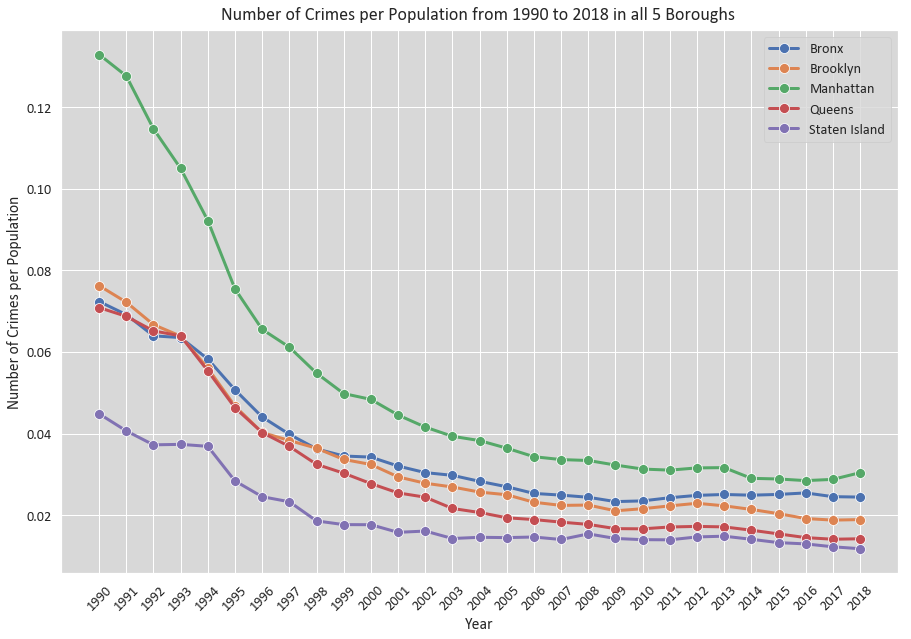

In [88]:

sns.set(style='darkgrid', font_scale=1.3, font="calibri", 
        rc={'axes.facecolor':'#d8d8d8'})
years = crimes['Year'].unique()
years_str = list(map(str, years))
plt.figure(figsize=(15,10))
for i in boroughs:
    sns.lineplot(y = 'Mean No. of Crime', x = 'Year',
                 data = meancrimes.groupby(['Borough','Year']).mean().loc[i].reset_index(), 
                 label=i,lw=3,marker='o',ms=10) ##this doesn't get the mean since every year only has one value. I did this just to get a value out
plt.title('Number of Crimes per Population from 1990 to 2018 in all 5 Boroughs ',pad=10, fontsize=18) #title
plt.xticks(years, years_str,rotation = 45) #plot the x-axis years but with labels as str format
plt.ylabel('Number of Crimes per Population')
plt.show() #plot graph out
    

In [89]:
landsize = highschooldata[['Borough','Land Size']]

In [90]:
meancrimes2 = pd.merge(crimes,landsize,on ='Borough')

In [91]:
meancrimes3 = meancrimes2[['Borough','Index Total','Land Size','Year']]

In [92]:
meancrimes3['No. of Crimes per km^2'] = meancrimes3['Index Total']/meancrimes3['Land Size']


<a id='crimeperarea'></a>


## Number of Crimes per area in all 5 boroughs

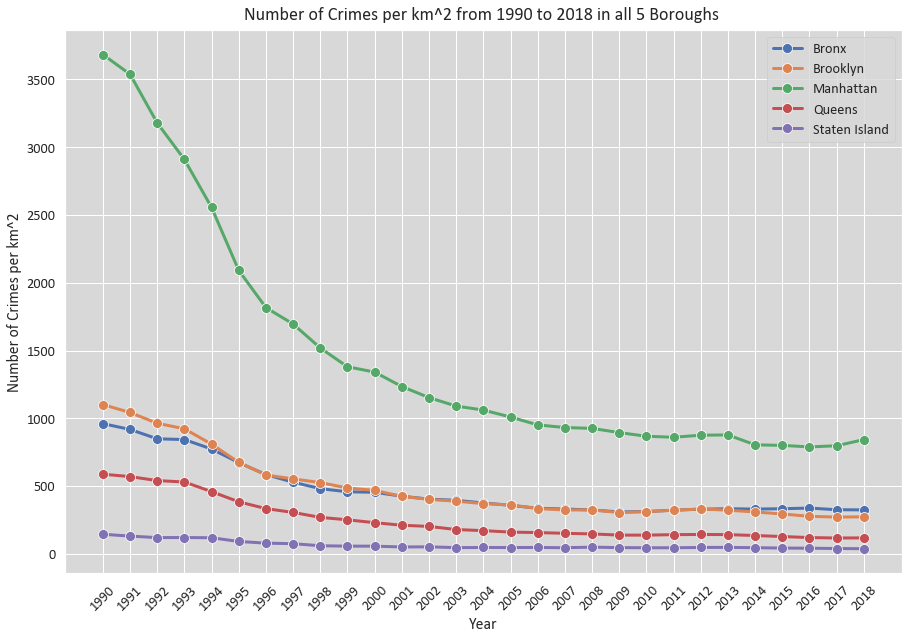

In [93]:
sns.set(style='darkgrid', font_scale=1.3, font="calibri", 
        rc={'axes.facecolor':'#d8d8d8'})
years = crimes['Year'].unique()
years_str = list(map(str, years))
plt.figure(figsize=(15,10))
for i in boroughs:
    sns.lineplot(y = 'No. of Crimes per km^2', x = 'Year',
                 data = meancrimes3.groupby(['Borough','Year']).mean().loc[i].reset_index(), 
                 label=i,lw=3,marker='o',ms=10) ##this doesn't get the mean since every year only has one value. I did this just to get a value out
plt.title('Number of Crimes per km^2 from 1990 to 2018 in all 5 Boroughs ',pad=10, fontsize=18) #title
plt.xticks(years, years_str,rotation = 45) #plot the x-axis years but with labels as str format
plt.ylabel('Number of Crimes per km^2')
plt.show() #plot graph out

In [94]:
crimes2018 = crimes.loc[(crimes['Year'] == 2018)]

In [95]:
crimes2018.reset_index(drop = True)
boroughnamecrimes = crimes2018['Borough'].unique()

In [96]:
crimes2018list = []
typeofcrimes = crimes2018.columns.tolist()
typeofcrimes = typeofcrimes[6:14]

for i in range(0,5):
    df = crimes2018.iloc[i,6:14].tolist()
    indextotal = [crimes2018.iloc[i,4].tolist()] * 8
    df = pd.DataFrame(list(zip(df,typeofcrimes,indextotal)),columns =['Number of Crimes','Type of Crime','Index Total'])
    df['Proportion of Type of Crime'] = df['Number of Crimes']/df['Index Total']
    df = df.drop(4,axis = 0)
    df = df.reset_index(drop = True)
    crimes2018list.append(df)

In [97]:
crimes2018list[0]


Number of Crimes        Type of Crime  Index Total  \
0              91.0               Murder      35355.0   
1             662.0                 Rape      35355.0   
2            3213.0              Robbery      35355.0   
3            8548.0   Aggravated Assault      35355.0   
4            2095.0             Burglary      35355.0   
5           19434.0              Larceny      35355.0   
6            1312.0  Motor Vehicle Theft      35355.0   

   Proportion of Type of Crime  
0                     0.002574  
1                     0.018724  
2                     0.090878  
3                     0.241776  
4                     0.059256  
5                     0.549682  
6                     0.037109

In [98]:
def crimetype(data,boroughdata):
    sns.set(style='darkgrid', font_scale=1.3, font="calibri", 
            rc={'axes.facecolor':'#d8d8d8'})
    fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15,10))

    for i,j in enumerate(ax.reshape(-1)):
        sns.barplot(x='Type of Crime',
                y='Proportion of Type of Crime',
                data=data[i], palette='Set2',ax = j)
        j.set_xticklabels(j.get_xticklabels(), rotation=70)
        j.set_title(boroughdata[i],fontsize = 20)
        j.set_ylabel('Proprtion of Crimes',fontsize = 20)
        j.set_xlabel('Type of Crimes',fontsize = 20)
    fig.tight_layout(pad=2.0)
    plt.suptitle("Proprtion of Different Types of Crimes In 2018", fontsize=20, y=1.01)
    plt.show()


<a id='typeofcrime'></a>



## Proportion of Types of Crimes in 2018

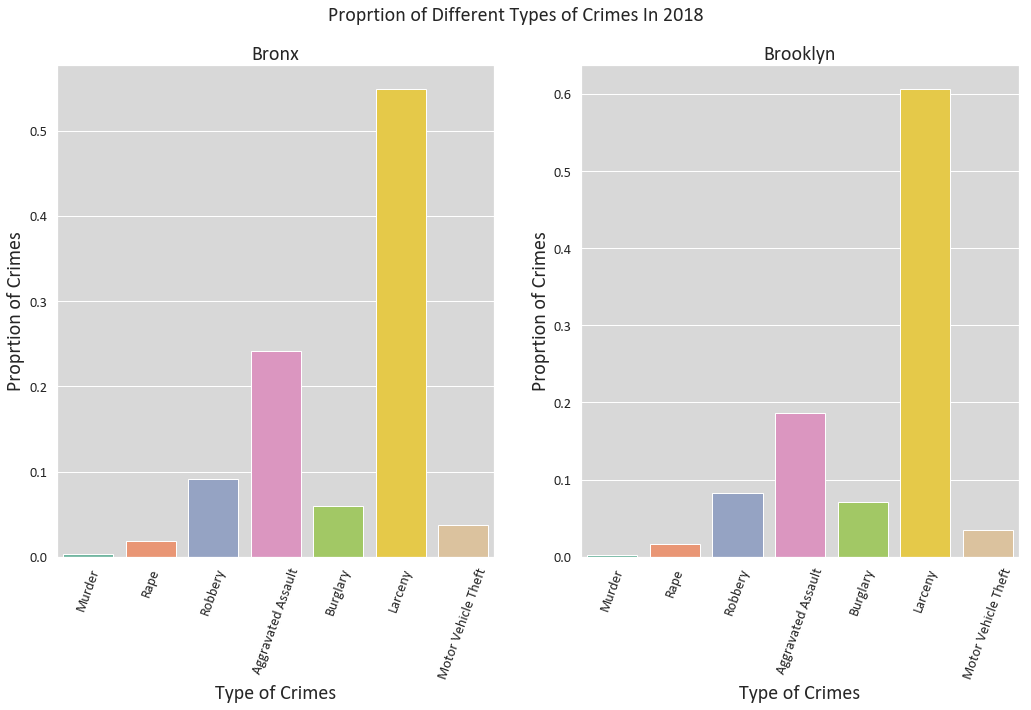

In [99]:
crimetype(crimes2018list[0:2],boroughnamecrimes[0:2])

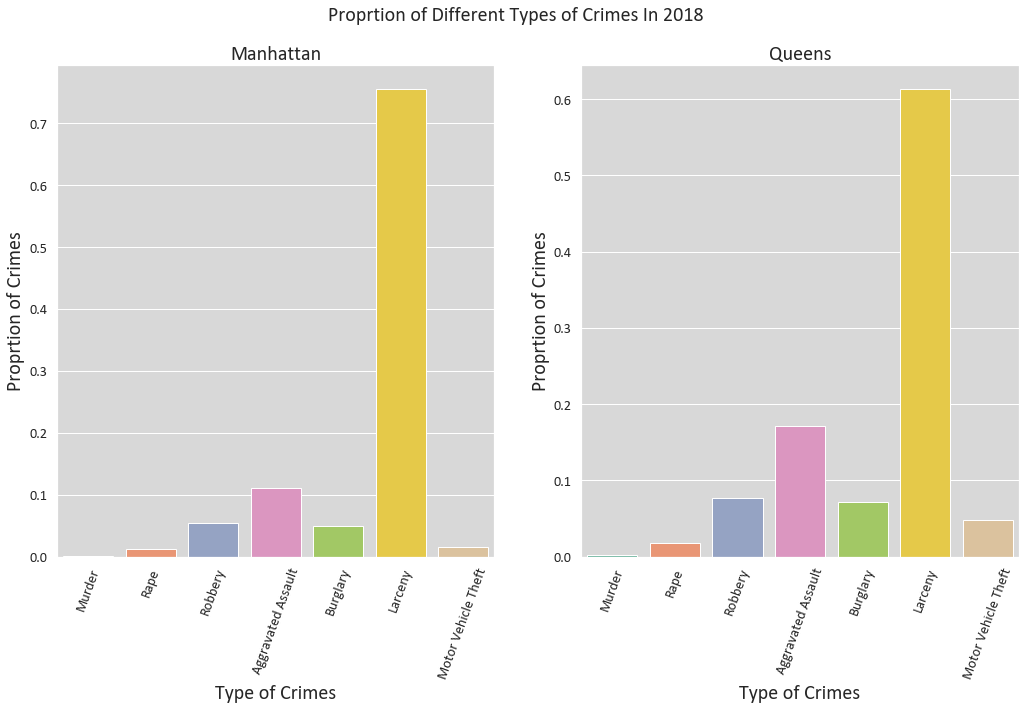

In [100]:
crimetype(crimes2018list[2:4],boroughnamecrimes[2:4])

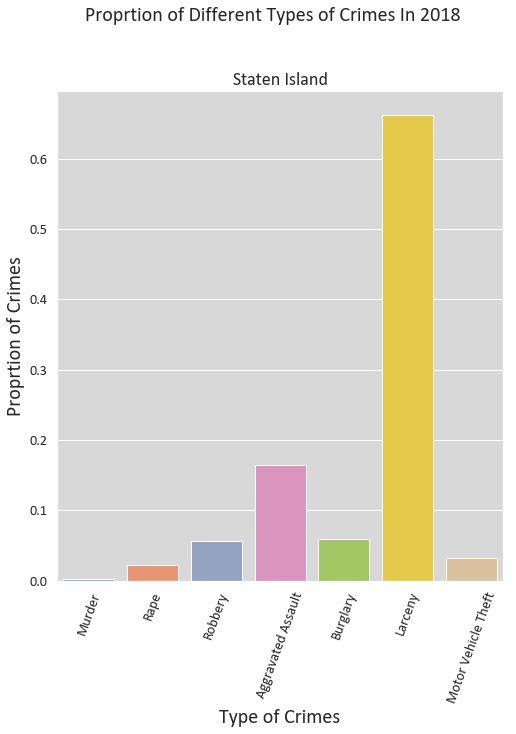

In [101]:

sns.set(style='darkgrid', font_scale=1.3, font="calibri", 
        rc={'axes.facecolor':'#d8d8d8'})
plt.figure(figsize=(8,9))


sns.barplot(x='Type of Crime',y='Proportion of Type of Crime',data=crimes2018list[4], palette='Set2')
plt.title('Staten Island',fontsize = 18)
plt.suptitle("Proprtion of Different Types of Crimes In 2018", fontsize=20, y=1.01)
plt.xticks(rotation = 70)
plt.xlabel('Type of Crimes',fontsize = 20)
plt.ylabel('Proprtion of Crimes', fontsize = 20)
plt.show()